# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning!

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [ ]:
!rm titanic_train.csv
!wget https://github.com/davidjohnnn/all_datasets/raw/master/bay/titanic_train.csv

rm: cannot remove 'titanic_train.csv': No such file or directory
--2024-09-27 10:18:45--  https://github.com/davidjohnnn/all_datasets/raw/master/bay/titanic_train.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/davidjohnnn/all_datasets/master/bay/titanic_train.csv [following]
--2024-09-27 10:18:45--  https://raw.githubusercontent.com/davidjohnnn/all_datasets/master/bay/titanic_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  58.89K  --.-KB/s    in 0.004s  

2024-09-27 10:18:45 (1

In [ ]:
df = pd.read_csv('https://github.com/davidjohnnn/all_datasets/raw/master/bay/titanic_train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop('PassengerId',axis=1,inplace=True)

In [ ]:
# simple version & keep only Age, Sex, Survived
# in the full version, remove this code
df = df[['Age', 'Sex', 'Survived', 'Pclass' , 'SibSp', 'Parch', 'Fare' ,'Cabin', 'Embarked']]

In [ ]:
cabin_counts = df['Cabin'].value_counts()
Embarked_count = df['Embarked'].value_counts()

cabin_counts
Embarked_count
df['Deck'] = df['Cabin'].str[0]
df.drop('Cabin',axis=1,inplace=True)
df.head()
Deck_count = df['Deck'].value_counts()
Deck_count

,count
Deck,
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


# Prepare Data

Let's begin some exploratory data analysis! We'll start by checking out missing data!



## Check Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Sex       891 non-null    object 
 2   Survived  891 non-null    int64  
 3   Pclass    891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Deck      204 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

Survived
0    549
1    342
Name: count, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

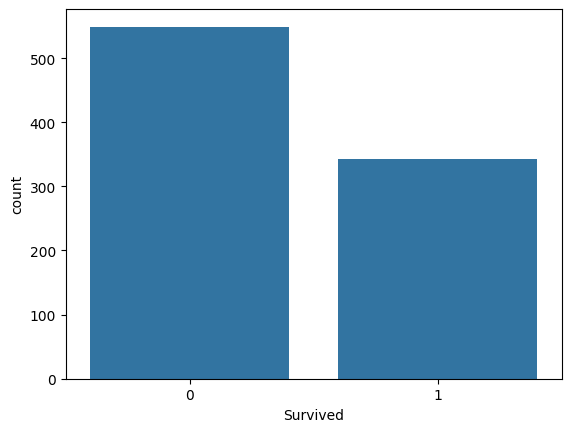

In [ ]:
print(df['Survived'].value_counts())
sns.countplot(x='Survived', data=df)

___
## Data Cleansing


In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):  # Check if Age is NaN
        if Pclass == 1:
            return df[df['Pclass'] == 1]['Age'].mean()  # Mean Age for Pclass 1
        elif Pclass == 2:
            return df[df['Pclass'] == 2]['Age'].mean()  # Mean Age for Pclass 2
        else:
            return df[df['Pclass'] == 3]['Age'].mean()  # Mean Age for Pclass 3
    else:
        return Age  # If Age is not NaN, return it as is

# Apply the function to impute Age
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

<ipython-input-244-1a082380a51c>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-244-1a082380a51c>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [ ]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Deck'].fillna('Unknown', inplace=True)

<ipython-input-244-1a082380a51c>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-244-1a082380a51c>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [ ]:
# check again!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Survived  891 non-null    int64  
 3   Pclass    891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Deck      891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


## Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [ ]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
deck = pd.get_dummies(df['Deck'],drop_first=True)
embraked = pd.get_dummies(df['Embarked'],drop_first=True)

In [ ]:
sex.head(3)
deck.head(3)
embraked.head(3)

,Q,S
0,False,True
1,False,False
2,False,True


In [ ]:
df.drop(['Sex'],axis=1,inplace=True)
df.drop(['Deck'],axis=1,inplace=True)
df.drop(['Embarked'],axis=1,inplace=True)

In [ ]:
df = pd.concat([df,sex],axis=1)
df = pd.concat([df,deck],axis=1)
df = pd.concat([df,embraked],axis=1)

In [ ]:
df.head()

,Age,Survived,Pclass,SibSp,Parch,Fare,male,B,C,D,E,F,G,T,Unknown,Q,S
0,22.0,0,3,1,0,7.2500,True,False,False,False,False,False,False,False,True,False,True
1,38.0,1,1,1,0,71.2833,False,False,True,False,False,False,False,False,False,False,False
2,26.0,1,3,0,0,7.9250,False,False,False,False,False,False,False,False,True,False,True
3,35.0,1,1,1,0,53.1000,False,False,True,False,False,False,False,False,False,False,True
4,35.0,0,3,0,0,8.0500,True,False,False,False,False,False,False,False,True,False,True


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1Z3P2bHD-7WORsHnCwWLhE8b2uTzrVsq-cUu17ODfMuA#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Survived  891 non-null    int64  
 2   Pclass    891 non-null    int64  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   male      891 non-null    bool   
 7   B         891 non-null    bool   
 8   C         891 non-null    bool   
 9   D         891 non-null    bool   
 10  E         891 non-null    bool   
 11  F         891 non-null    bool   
 12  G         891 non-null    bool   
 13  T         891 non-null    bool   
 14  Unknown   891 non-null    bool   
 15  Q         891 non-null    bool   
 16  S         891 non-null    bool   
dtypes: bool(11), float64(2), int64(4)
memory usage: 51.5 KB


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).



## Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Survived',axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=101)

## Training and Predicting

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(list(y_test[:5]))
print(y_pred[:5])

[0, 0, 0, 1, 0]
[0 0 0 0 1]


Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
confusion_matrix(y_test, y_pred, labels=[0,1])

array([[146,  19],
       [ 39,  64]])

In [ ]:
print(classification_report(y_test,y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7892    0.8848    0.8343       165
           1     0.7711    0.6214    0.6882       103

    accuracy                         0.7836       268
   macro avg     0.7801    0.7531    0.7612       268
weighted avg     0.7822    0.7836    0.7781       268



## Check model parameters

In [ ]:
print(X.columns)
print(model.intercept_)
print(model.coef_)

Index(['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'male', 'B', 'C', 'D', 'E',
       'F', 'G', 'T', 'Unknown', 'Q', 'S'],
      dtype='object')
[4.13659958]
[[-0.03965993 -0.77537998 -0.30356462 -0.17698841  0.00394392 -2.76230773
   0.64664533  0.47873585  1.14749806  1.29148439  0.3173312  -0.28250599
  -0.11469779 -0.22142028  0.46818468 -0.07484057]]


#REPORT

  2.1 Use all variables

  อันนี้คือผลลัพธ์จากการใช้ทุกตัวแปร โดยผมได้มีการปรับ cabin เป็น Deck เพื่อนำแค่first letter ของcabin มาทำโมเดล เพราะ ตัวเลขหลังตัวอักษรในcabinไม่ได้มีความสำคัญ แต่ตัวอักษรแรกตรงcabinเป็นการแบ่ง ประเภทของcabin
  
  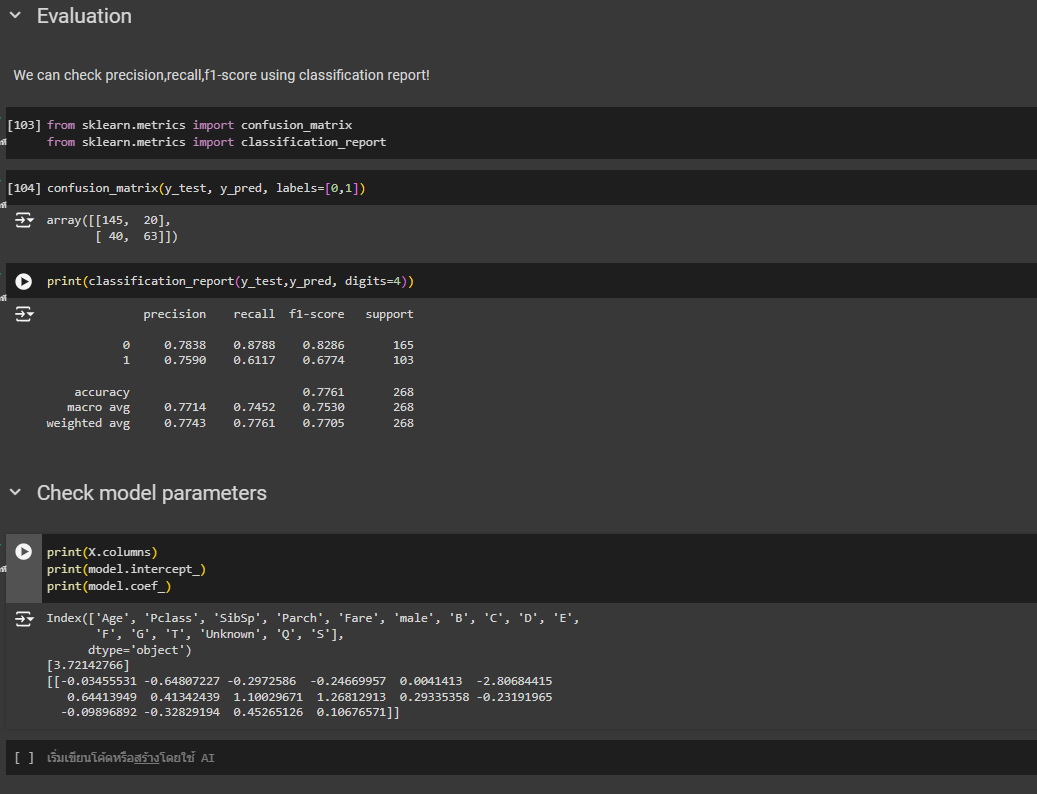
  


##2.2Impute missing values

  2.2.1 Impute categorical with mode

  ทำแล้วตามในcodeเลย
  
  แต่ตัวแปรdeck ขอจัดการกับmissing value ด้วย การ fill NA ด้วย "Unknows" เพราะ จากข้อมูล แต่ละประเภท deck จำนวนที่ซำ้ไม่ได้ต่างกันมาก ที่ไม่เลือกลบคอลัมนี้ออกเพราะลองลบแล้ว model macro avg F1 score= 0.7303 น้อยกว่าใส่ไป
  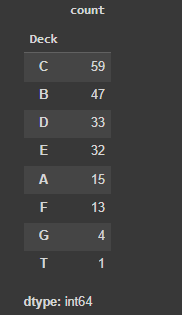
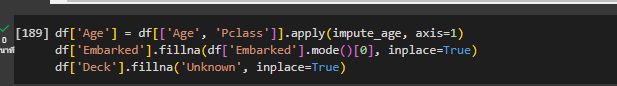


  2.2.2 Improve how to impute “Age”. Rather than just using an average for the
  
   whole passengers, we should impute age differently for each passenger class (Pclass).
  
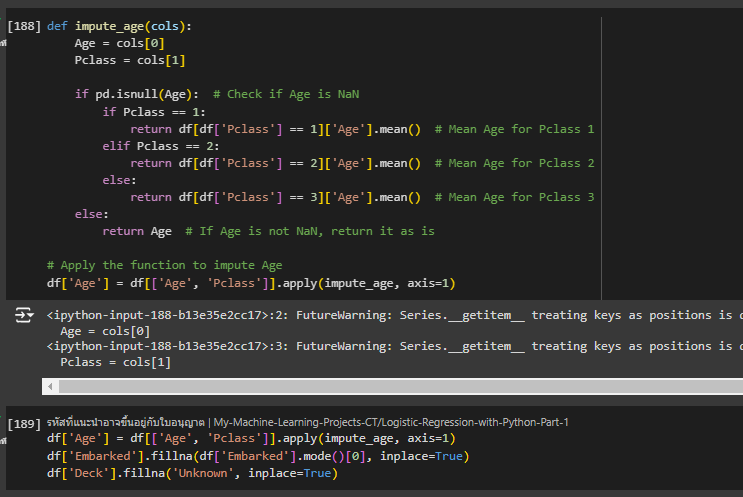

2.3 Some variables should be dropped manually.

drop ticket กับ name passenger ไป เพราะไม่ได้มีประโยชน์ต่อการทำนาย


2.4 Evaluate and compare these improvements in 2.1-2.2 to the simple model in Demo which are applied 2 variables i.e. Age, Sex.  Student can report in terms of Macro F1; which one is better?

model ที่ไม่ได้ทำการปรับ การคำนวณmean ตาม2.2 มี macro avg F1 score = 0.7530
model ที่ทำการปรับกาาคำนวณ mean age มี macro avg F1 score =0.7612
ดังนั้นการปรับการคำนวณ mean age แบ่งตาม Pclass มีค่าmacro avg F1 ดีกว่า 0.0082

  
2.5 Compute odds ratio for “Age” and Explain (Hint อายุเพิ่ม 1 ปี ส่งผลให้ค่า odd เพิ่มขึ้น/ลดลง กี่ %)

  exp(w1)=exp(-0.03965993) = 0.961 = (-3.9%)
  ทุกอายุที่เพิ่ม 1ปี โอกาสที่ตายจะเพิ่มขึ้น 3.9 %